In [17]:
import sys
sys.path.insert(0, '../tools')

%load_ext prov_magics
import provn
import prov_dictionary

@provn.graph.prov("hadMember")
def had_member(dot, ecollection=None, eid=None, attrs=None, id_=None):
    return provn._arrow2(dot, ecollection, eid, "[ ]")


The prov_magics extension is already loaded. To reload it, use:
  %reload_ext prov_magics


# Plain PROV

In this document we map simple script constructs to plain PROV

## Names, literals, and constants

`entities` represent variables names, literals (e.g., "a", 1, True), and constants (e.g., `...`)
```python
1     # literal
"a"   # literal
b"a"  # literal
True  # literal
int   # names
...   # constant
```

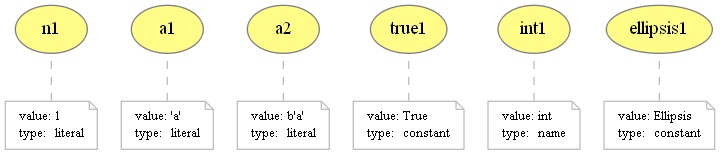

In [18]:
%%provn -o ../plain_prov/names.png
entity(n1, [value="1", type="literal"])
entity(a1, [value="'a'", type="literal"])
entity(a2, [value="b'a'", type="literal"])
entity(true1, [prov:value="True", type="constant"])
entity(int1, [prov:value="int", type="name"])
entity(ellipsis1, [prov:value="Ellipsis", type="constant"])

## Assignment

We represent an assignment by an `activity` that uses the `entities` on the right side to generate an `entity` on the left side. 

An assignment creates a new entity for the name on the left side even when the name already exists.

```python
m = 10000
```

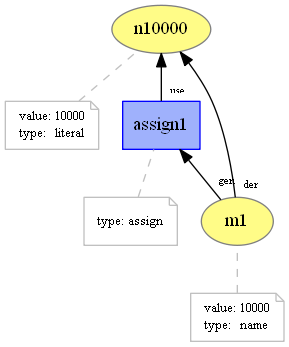

In [19]:
%%provn -o ../plain_prov/assign.png
entity(n10000, [value="10000", type="literal"])
entity(m1, [value="10000", type="name"])

activity(assign1, [type="assign"])
used(u1; assign1, n10000, -)
wasGeneratedBy(g1; m1, assign1, -)
wasDerivedFrom(m1, n10000, assign1, g1, u1)

## Operation

Similar to assigments, we also use `activities` to map operations. However, instead of producing an `entity` for a variable name, it produces an `entity` for the evaluation result.

```python
m + 1
```

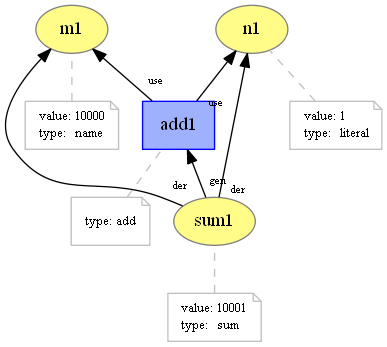

In [20]:
%%provn -o ../plain_prov/operation.png
entity(m1, [value="10000", type="name"])
entity(n1, [value="1", type="literal"])
entity(sum1, [value="10001", type="sum"])

activity(add1, [type="add"])
used(u2; add1, m1, -)
used(u3; add1, n1, -)
wasGeneratedBy(g2; sum1, add1, -)
wasDerivedFrom(sum1, m1, add1, g2, u2)
wasDerivedFrom(sum1, n1, add1, g3, u3)

## List definition

A list is represented by an `entity` with `hadMember` relationships to its parts.


The provenance of a `Floyd-Warshall` execution should indicate the position of accessed elements in the result matrix (list of lists) to allow the querying of the shortest-path between two nodes. However, using just the `hadMember` relationship, we cannot know in which position of the list a member exists (note below that an `entity` may repeat in multiple positions). Thus, to allow this query, we create an extra `entity` for every position in the list and we use an `activity` to derive these `entities` from the actual `entities` that compose the list.

For simplicity, in the case of the definition of matrices, we use a single `activity` to represent all the derivations, instead of an `activity` for each row.

```python
[m, m + 1, m]
```

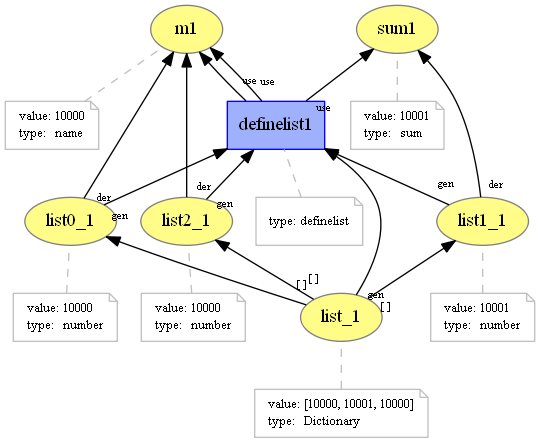

In [21]:
%%provn -o ../plain_prov/list.png
entity(m1, [value="10000", type="name"])
entity(sum1, [value="10001", type="sum"])

entity(list_1, [value="[10000, 10001, 10000]", type="Dictionary"])
entity(list0_1, [value="10000", type="number"])
entity(list1_1, [value="10001", type="number"])
entity(list2_1, [value="10000", type="number"])

hadMember(list_1, list0_1)
hadMember(list_1, list1_1)
hadMember(list_1, list2_1)

activity(definelist1, [type="definelist"])
used(u4; definelist1, m1, -)
wasGeneratedBy(g4; list0_1, definelist1, -)
wasDerivedFrom(list0_1, m1, definelist1, g4, u4)
used(u5; definelist1, sum1, -)
wasGeneratedBy(g5; list1_1, definelist1, -)
wasDerivedFrom(list1_1, sum1, definelist1, g5, u5)
used(u6; definelist1, m1, -)
wasGeneratedBy(g6; list2_1, definelist1, -)
wasDerivedFrom(list2_1, m1, definelist1, g6, u6)
wasGeneratedBy(list_1, definelist1, -)

## Assign list definition

When we assign a list definition to a variable, we must create new entities not only for the variable, but also for all of its parts.

```python
d = [m, m + 1, m]
```

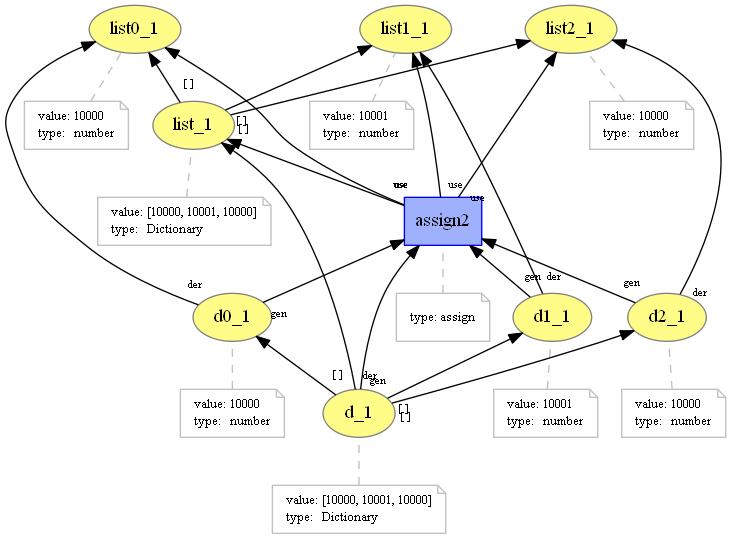

In [22]:
%%provn -o ../plain_prov/list_assign.png
// old entities from previous figure
entity(list_1, [value="[10000, 10001, 10000]", type="list"])
entity(list0_1, [value="10000", type="number"])
entity(list1_1, [value="10001", type="number"])
entity(list2_1, [value="10000", type="number"])

hadMember(list_1, list0_1)
hadMember(list_1, list1_1)
hadMember(list_1, list2_1)

// new entities
entity(d_1, [value="[10000, 10001, 10000]", type="name"])
entity(d0_1, [value="10000", type="number"])
entity(d1_1, [value="10001", type="number"])
entity(d2_1, [value="10000", type="number"])

hadMember(d_1, d0_1)
hadMember(d_1, d1_1)
hadMember(d_1, d2_1)


activity(assign2, [type="assign"])
used(u7; assign2, list_1, -)
wasGeneratedBy(g7; d_1, assign2, -)
wasDerivedFrom(d_1, list_1, assign2, g7, u7)
used(u8; assign2, list0_1, -)
wasGeneratedBy(g8; d0_1, assign2, -)
wasDerivedFrom(d0_1, list0_1, assign2, g8, u8)
used(u9; assign2, list1_1, -)
wasGeneratedBy(g9; d1_1, assign2, -)
wasDerivedFrom(d1_1, list1_1, assign2, g9, u9)
used(u10; assign2, list2_1, -)
wasGeneratedBy(g10; d2_1, assign2, -)
wasDerivedFrom(d2_1, list2_1, assign2, g10, u10)

The same mapping is valid for assignments to names that represent dictionaries

```python
x = d
```

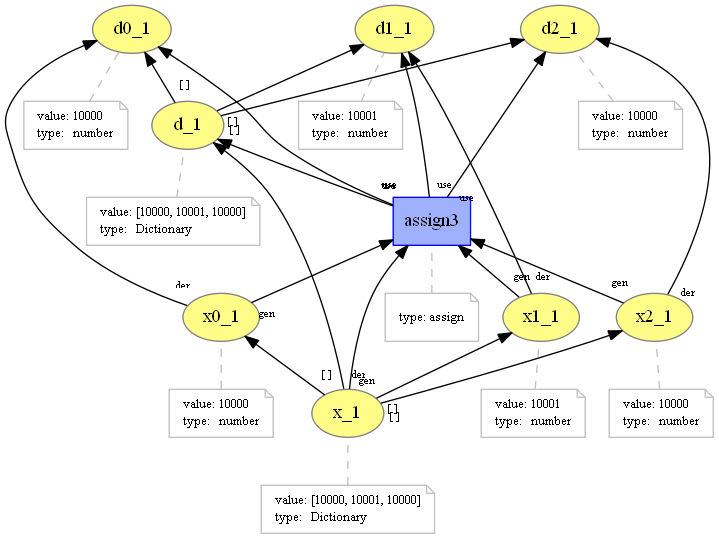

In [24]:
%%provn -o ../plain_prov/list_assign2.png
// old entities from previous figure
entity(d_1, [value="[10000, 10001, 10000]", type="name"])
entity(d0_1, [value="10000", type="number"])
entity(d1_1, [value="10001", type="number"])
entity(d2_1, [value="10000", type="number"])

hadMember(d_1, d0_1)
hadMember(d_1, d1_1)
hadMember(d_1, d2_1)

// new entities
entity(x_1, [value="[10000, 10001, 10000]", type="name"])
entity(x0_1, [value="10000", type="number"])
entity(x1_1, [value="10001", type="number"])
entity(x2_1, [value="10000", type="number"])

hadMember(x_1, x0_1)
hadMember(x_1, x1_1)
hadMember(x_1, x2_1)

activity(assign3, [type="assign"])
used(u11; assign3, d_1, -)
wasGeneratedBy(g11; x_1, assign3, -)
wasDerivedFrom(x_1, d_1, assign3, g11, u11)
used(u12; assign3, d0_1, -)
wasGeneratedBy(g12; x0_1, assign3, -)
wasDerivedFrom(x0_1, d0_1, assign3, g12, u12)
used(u13; assign3, d1_1, -)
wasGeneratedBy(g12; x1_1, assign3, -)
wasDerivedFrom(x1_1, d1_1, assign3, g13, u13)
used(u14; assign3, d2_1, -)
wasGeneratedBy(g14; x2_1, assign3, -)
wasDerivedFrom(x2_1, d2_1, assign3, g14, u14)

## Function call

We map a function call as an `activity` that `uses` its parameters and `generates` an `entity` with its return. 

When we do not know the function call implementation, we cannot use `derivation` relationships

```python
len(d)
```

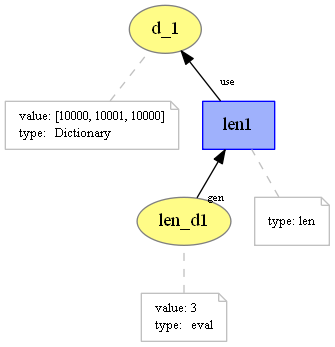

In [26]:
%%provn -o ../plain_prov/call.png
entity(d_1, [value="[10000, 10001, 10000]", type="name"])
entity(len_d1, [value="3", type="eval"])

activity(len1, [type="len"])
used(len1, d_1, -)
wasGeneratedBy(len_d1, len1, -)

## Access

We map an access as an `activity` that generates the accessed `entity`, by using the list `entity`, the list element, and the index, when it is explicitly used (for-each loops iterates over lists without explicit item `entities`). The generated `entity` derives from the list element.

```python
d[0]
```

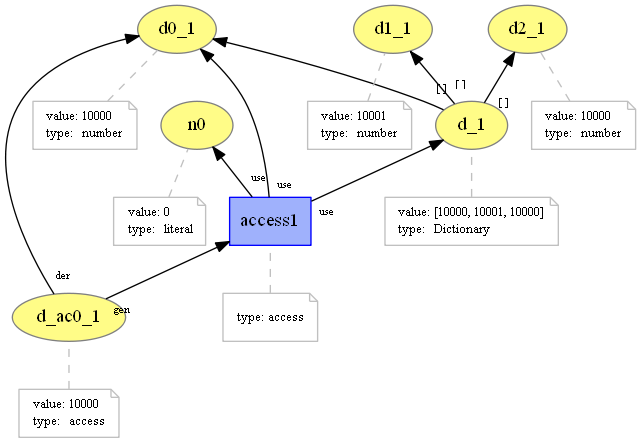

In [27]:
%%provn -o ../plain_prov/access.png
//previous
entity(d_1, [value="[10000, 10001, 10000]", type="name"])
entity(d0_1, [value="10000", type="number"])
entity(d1_1, [value="10001", type="number"])
entity(d2_1, [value="10000", type="number"])

hadMember(d_1, d0_1)
hadMember(d_1, d1_1)
hadMember(d_1, d2_1)


//access
entity(n0, [value="0", type="literal"])
entity(d_ac0_1, [value="10000", type="access"])

activity(access1, [type="access"])
used(access1, d_1, -)
used(access1, n0, -)
used(u15; access1, d0_1, -)
wasGeneratedBy(g15; d_ac0_1, access1, -)
wasDerivedFrom(d_ac0_1, d0_1, access1, g15, u15)

## Part Assignment

A part assignment is similitar to an assignment, but it creates a new `entity` for the whole `entity` with `hadMember` relationships to the new part and to the other parts that are valid. 

If there is more than one variable or data structure with a reference to the changed list, we must update all the lists.

The assignment `activity` uses all the changed `entities` and generates new versions of them. Additionally, it uses the right side of the assignment to derive an entity for the left side. 

```python
d[1] = 3
```

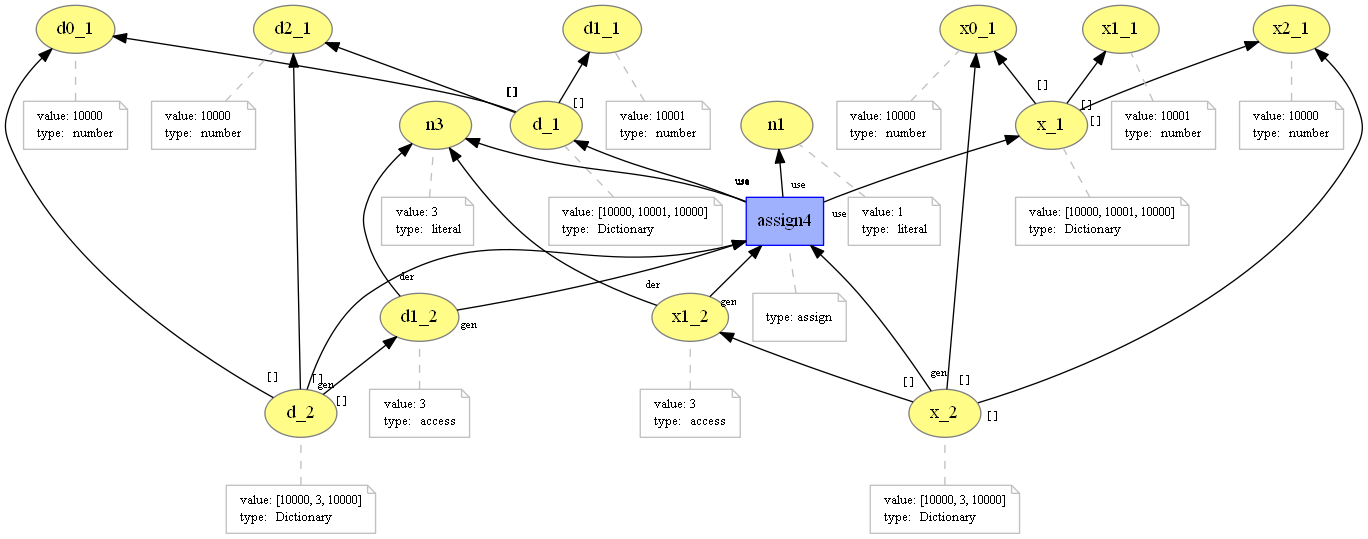

In [29]:
%%provn -o ../plain_prov/part_assign.png
//previous
entity(d_1, [value="[10000, 10001, 10000]", type="name"])
entity(d0_1, [value="10000", type="number"])
entity(d1_1, [value="10001", type="number"])
entity(d2_1, [value="10000", type="number"])

hadMember(d_1, d0_1)
hadMember(d_1, d1_1)
hadMember(d_1, d2_1)

entity(x_1, [value="[10000, 10001, 10000]", type="name"])
entity(x0_1, [value="10000", type="number"])
entity(x1_1, [value="10001", type="number"])
entity(x2_1, [value="10000", type="number"])

hadMember(x_1, x0_1)
hadMember(x_1, x1_1)
hadMember(x_1, x2_1)


//part assign
entity(n1, [value="1", type="literal"])
entity(n3, [value="3", type="literal"])
entity(d1_2, [value="3", type="access"])
entity(x1_2, [value="3", type="access"])

entity(d_2, [value="[10000, 3, 10000]", type="name"])
hadMember(d_2, d0_1)
hadMember(d_2, d1_2)
hadMember(d_2, d2_1)

entity(x_2, [value="[10000, 3, 10000]", type="name"])
hadMember(x_2, x0_1)
hadMember(x_2, x1_2)
hadMember(x_2, x2_1)

activity(assign4, [type="assign"])
used(assign4, d_1, -)
used(assign4, x_1, -)
used(assign4, n1, -)
used(u16; assign4, n3, -)
wasGeneratedBy(d_2, assign4, -)
wasGeneratedBy(x_2, assign4, -)
wasGeneratedBy(g16; d1_2, assign4, -)
wasDerivedFrom(d1_2, n3, assign4, g16, u16)
wasGeneratedBy(g17; x1_2, assign4, -)
wasDerivedFrom(x1_2, n3, assign4, g17, u16)


